In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
df = pd.read_csv("economic_index.csv")

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [8]:
df.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

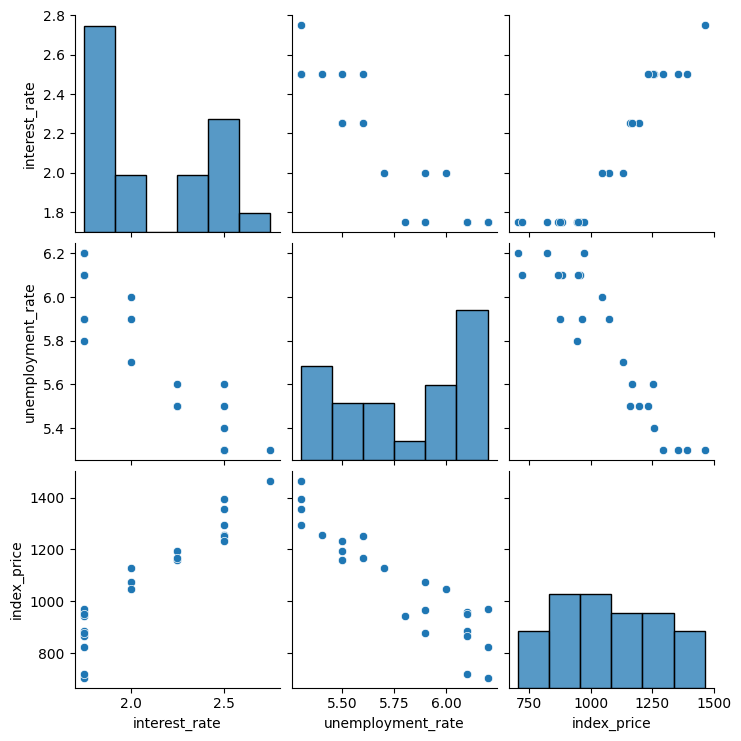

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

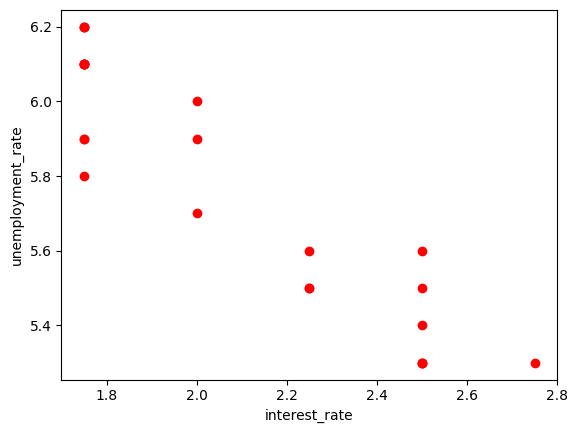

In [12]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

Text(0, 0.5, 'index_price')

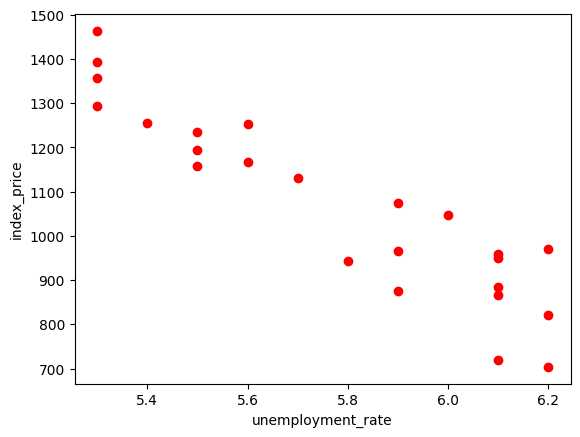

In [13]:
plt.scatter(df['unemployment_rate'],df['index_price'],color='r')
plt.xlabel('unemployment_rate')
plt.ylabel('index_price')

Text(0, 0.5, 'index_price')

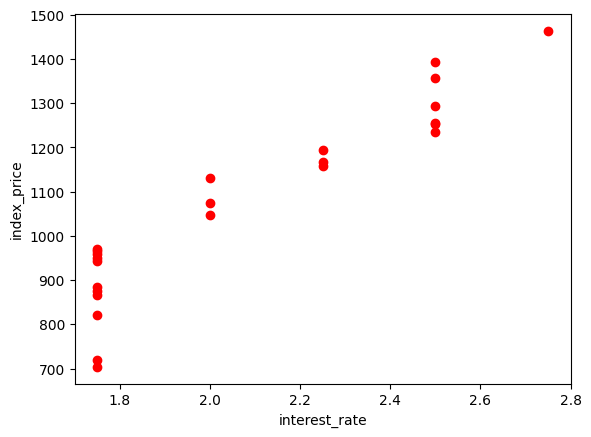

In [14]:
plt.scatter(df['interest_rate'],df['index_price'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('index_price')

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

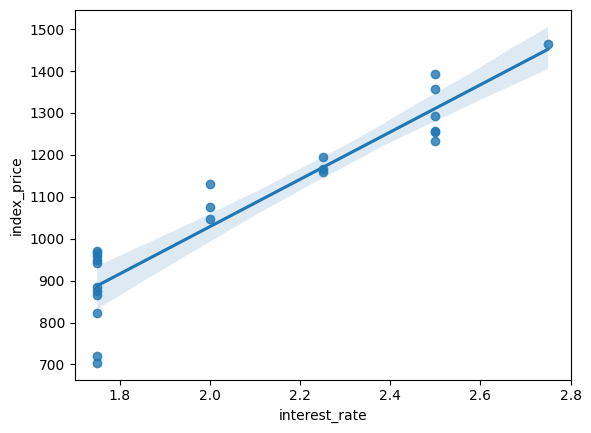

In [19]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

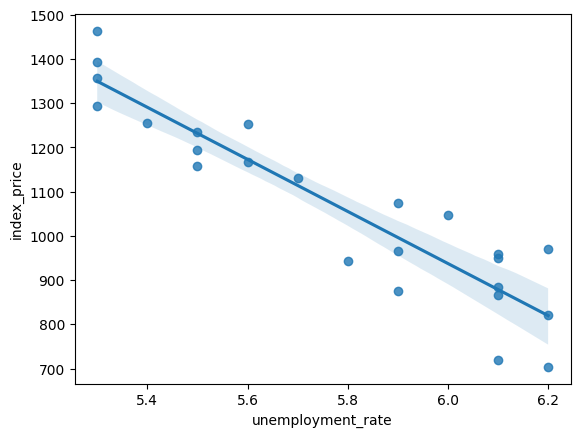

In [20]:
sns.regplot(x='unemployment_rate',y='index_price',data=df)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
X_train

array([[-0.89073374,  1.25707872],
       [ 1.35954097, -0.62853936],
       [ 1.35954097, -1.5713484 ],
       [-0.14064217,  0.62853936],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -1.5713484 ],
       [ 1.35954097, -1.25707872],
       [-0.89073374,  1.25707872],
       [-0.89073374,  0.94280904],
       [-0.89073374,  0.31426968],
       [-0.89073374,  0.94280904],
       [ 0.6094494 , -0.94280904],
       [-0.14064217, -0.31426968],
       [-0.89073374,  0.        ],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -0.94280904]])

In [25]:
X_test

array([[ 0.35355339, -0.6882472 ],
       [-1.06066017,  1.45296631],
       [ 1.76776695, -1.30002249],
       [-1.06066017,  1.14707867],
       [-0.35355339,  0.53530338],
       [ 0.35355339, -0.38235956],
       [-1.06066017,  0.53530338],
       [ 1.06066017, -1.30002249]])

In [26]:
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Cross Validation


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [30]:
np.mean(validation_score)

np.float64(-6492.483626060827)

In [31]:
y_pred = regression.predict(X_test)

In [32]:
y_pred

array([1141.63549621,  787.98167849, 1339.94389614,  819.05076205,
        949.27404557, 1110.56641265,  881.18892917, 1271.85877973])

In [33]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("Mean Absolute Error",mae)
print("Root mean Squared Error",rmse)

Mean Squared Error 11792.511387420982
Mean Absolute Error 97.18750000000014
Root mean Squared Error 108.59333030817768


In [34]:
score = r2_score(y_test,y_pred)
print("R2 Square",score)

R2 Square 0.6848174339176978


In [35]:
#Adjusted R2 Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5587444074847768

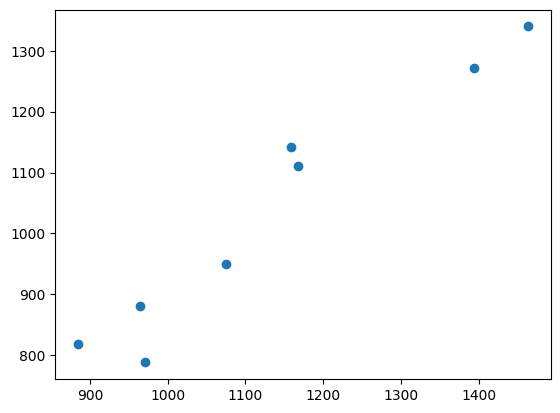

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
residuals = y_test - y_pred
print(residuals)

8      17.364504
16    183.018322
0     124.056104
18     64.949238
11    125.725954
9      56.433587
13     83.811071
1     122.141220
Name: index_price, dtype: float64


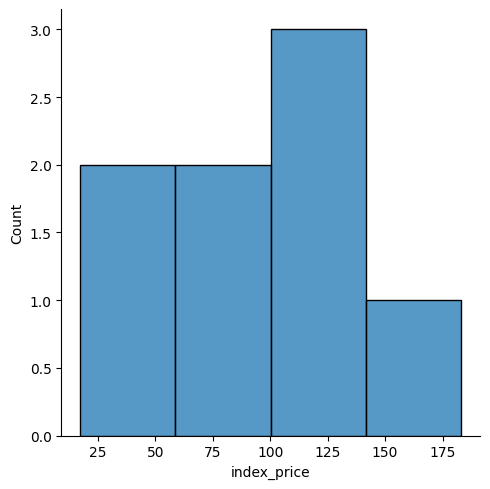

In [38]:
# Without kind = 'kde' make the normal distribution
sns.displot(residuals)

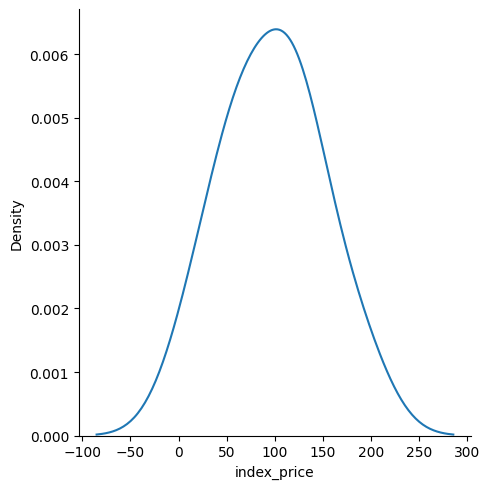

In [39]:
sns.displot(residuals,kind='kde')

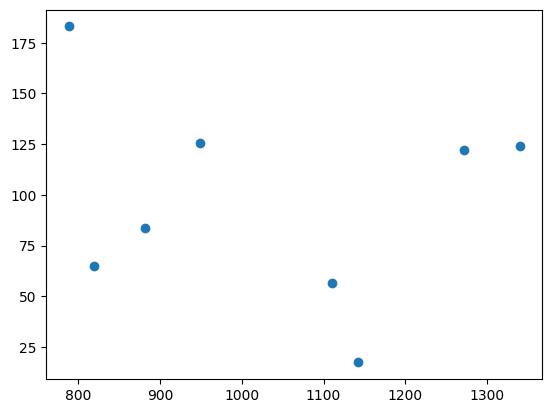

In [40]:
plt.scatter(y_pred,residuals)

In [41]:
import statsmodels.api as sms

In [42]:
model = sms.OLS(y_train,X_train).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.105
Method:                 Least Squares   F-statistic:                             0.2425
Date:                Fri, 07 Nov 2025   Prob (F-statistic):                       0.788
Time:                        22:59:42   Log-Likelihood:                         -133.85
No. Observations:                  16   AIC:                                      271.7
Df Residuals:                      14   BIC:                                      273.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            96.2869    682.952      0.141      0.890   -1368.500    1561.074
x2          -101.5702    682.952     -0.149      0.884   -1566.357    1363.216
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.412
Skew:                          -0.327   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                         4.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print(regression.coef_)

[  96.28689501 -101.57024663]
